# Jeopardy Game

The goal of this project is to investigate a dataset of "Jeopardy" game using pandas methods and write several aggregate functions to find some insights. 

## Tasks

### 1. Investigate and Clean

1.1. First we import libraries to work with. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

1.2. After that we load the data from `jeopardy.csv.` into a DataFrame and investigate its contents. 

In [2]:
jeopardy = pd.read_csv('jeopardy.csv')

1.3. Let's print truncated dataset.

In [3]:
jeopardy

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


1.4. Seems like questions are troncated. Let's fix this for this dataset - it might come handy in the future. 

In [4]:
pd.set_option('display.max_colwidth', None)

1.5. Now let's try to print out specific columns.

In [5]:
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

1.6. Columns names contain weird spaces that slow down the work, so let's rename them.

In [6]:
jeopardy.rename(columns={
    'Show Number': 'show_number',
    ' Air Date': 'air_date', 
    ' Round': 'round',
    ' Category': 'category',
    ' Value': 'value',
    ' Question': 'question',
    ' Answer': 'answer'
}, inplace=True)
jeopardy.head(5)

,show_number,air_date,round,category,value,question,answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,"The city of Yuma in this state has a record average of 4,055 hours of sunshine each year",Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", this company served its billionth burger",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Constitution of Mass., second President of the United States",John Adams


1.7. Let's check columns' data types to understand whether they are acceptable for wrangling.

In [7]:
jeopardy.dtypes

show_number     int64
air_date       object
round          object
category       object
value          object
question       object
answer         object
dtype: object

Seems like `value` column definitely should be numeric to perform some actions with it. 

1.8. Let's check what acsessive symbols it has to remove them. 

In [8]:
jeopardy.value.unique()

array(['$200', '$400', '$600', '$800', '$2,000', '$1000', '$1200',
       '$1600', '$2000', '$3,200', 'None', '$5,000', '$100', '$300',
       '$500', '$1,000', '$1,500', '$1,200', '$4,800', '$1,800', '$1,100',
       '$2,200', '$3,400', '$3,000', '$4,000', '$1,600', '$6,800',
       '$1,900', '$3,100', '$700', '$1,400', '$2,800', '$8,000', '$6,000',
       '$2,400', '$12,000', '$3,800', '$2,500', '$6,200', '$10,000',
       '$7,000', '$1,492', '$7,400', '$1,300', '$7,200', '$2,600',
       '$3,300', '$5,400', '$4,500', '$2,100', '$900', '$3,600', '$2,127',
       '$367', '$4,400', '$3,500', '$2,900', '$3,900', '$4,100', '$4,600',
       '$10,800', '$2,300', '$5,600', '$1,111', '$8,200', '$5,800',
       '$750', '$7,500', '$1,700', '$9,000', '$6,100', '$1,020', '$4,700',
       '$2,021', '$5,200', '$3,389', '$4,200', '$5', '$2,001', '$1,263',
       '$4,637', '$3,201', '$6,600', '$3,700', '$2,990', '$5,500',
       '$14,000', '$2,700', '$6,400', '$350', '$8,600', '$6,300', '$250',
    

1.9. We are going to replace **"None"** value with `NaN`, which won't be a part of any calculations and remove other unnecessary symbols. 

In [9]:
# Replace 'None' with NaN
jeopardy[jeopardy.columns] = jeopardy[jeopardy.columns].replace('None', np.NaN)

# Remove unnecessary symbols & reformat a column
cut_the_tails = lambda column: pd.to_numeric(column.replace('[\$%,]', '', regex=True))
jeopardy.value = cut_the_tails(jeopardy.value)
jeopardy.value

0          200.0
1          200.0
2          200.0
3          200.0
4          200.0
           ...  
216925    2000.0
216926    2000.0
216927    2000.0
216928    2000.0
216929       NaN
Name: value, Length: 216930, dtype: float64

1.10. Now it's a numeric type and we can check out some stats of the `value` column. 

In [10]:
jeopardy.value.describe()

count    213296.000000
mean        752.595923
std         637.855303
min           5.000000
25%         400.000000
50%         600.000000
75%        1000.000000
max       18000.000000
Name: value, dtype: float64

### 2. Words Finder

2.1. We are going to write a function that filters the dataset for questions that contains all of the words in a list of words. For example, when the list `["King", "England"]` was passed to our function, the function returned every row that has the strings "King" and "England" somewhere in its "Question" column.

In [11]:
def find_words(dataset, column, word_list):
    rows = column.apply(lambda x: True)
    for word in word_list:
        rows = rows & column.str.contains('\\b' + word + '\\b', case=False)
    return dataset[rows]

word_list = ['England', 'King']
questions = find_words(jeopardy, jeopardy.question, word_list)


2.2. Now let's write a function that returns the count of the unique answers to all of the questions in a dataset. 

In [12]:
def find_uniq_answ(dataset):
    return dataset.groupby('answer').answer.count().reset_index(name = 'count')
    
# find_uniq_answ(jeopardy)

2.3. Now we going to find how many unique answers we get after filtering the dataset by "King" and "England". Let's sort them in descending order to see the most common ones.

In [13]:
find_uniq_answ(questions).sort_values('count', ascending = False).head(10)

,answer,count
78,William the Conqueror,5
42,James I,3
66,Richard the Lionhearted,3
57,Oliver Cromwell,3
28,George I,3
39,Henry VIII,3
29,George III,3
31,Georgia,2
65,Richard the Lionheart,2
64,Richard III,2


### 3. Search for Facts and Patterns 

#### 3.1. Rounds and Categories

Is there a connection between the round and the category? Are you more likely to find certain categories, like "Literature" in Single Jeopardy or Double Jeopardy? Let's find some patterns between rounds, categories and values. 

3.1.1. We are going to start with finding all unique rounds' names. There are only 4 of them so we can also display them.

In [14]:
jeopardy['round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

3.1.2. To make this column suitable for calculations we need to convert it to the new data type `category`.

In [15]:
order = ['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker']
jeopardy['round'] = pd.Categorical(jeopardy['round'], order, ordered=True)

3.1.3. Let's find how many questions each category contains.

In [16]:
groupby_round = jeopardy.groupby('round').category.count()
groupby_round

round
Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: category, dtype: int64

Judging by the number of questions we can suppose that rounds of the game have the exact same order which we got in our result. 

3.1.4. Now let's find the number of unique categories. There will be a lot of them considering the first print of the dataset. 

In [17]:
len(jeopardy['category'].unique())

27995

Wow, guys really worked hard to reach such numbers...

3.1.5. Let's find the categories by rounds with the greatest amounts of questions within them.

In [18]:
groupby_category = jeopardy.value_counts(['category','round']).reset_index(name='questions_count')
groupby_category = groupby_category[groupby_category.questions_count > 0]
groupby_category


,category,round,questions_count
0,BEFORE & AFTER,Double Jeopardy!,450
1,LITERATURE,Double Jeopardy!,381
2,SCIENCE,Double Jeopardy!,296
3,POTPOURRI,Jeopardy!,255
4,STUPID ANSWERS,Jeopardy!,255
...,...,...,...
31681,CITIES IN ENGLAND,Final Jeopardy!,1
31682,STREISAND FILMS,Double Jeopardy!,1
31683,CHRISTMAS TRADITIONS,Final Jeopardy!,1
31684,STRUCTURES,Final Jeopardy!,1


3.1.6. How about visualising this table on scatter plot? 

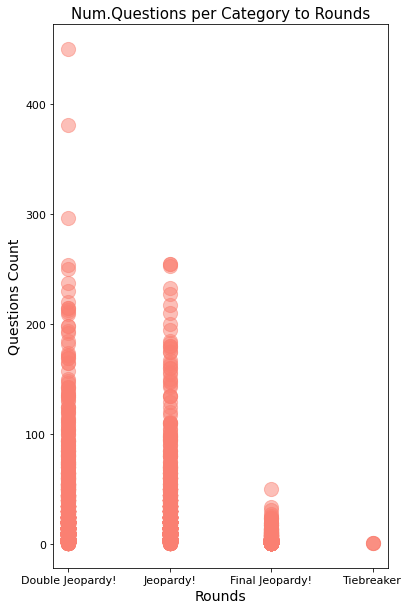

In [19]:
plt.figure(figsize=(6, 10))
plt.scatter(groupby_category['round'], groupby_category['questions_count'], c='salmon', s=200, alpha=0.5)

plt.xlabel('Rounds', fontsize=14)
plt.ylabel('Questions Count', fontsize=14)
plt.title('Num.Questions per Category to Rounds', fontsize=15)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [20]:
plt.clf()

<Figure size 432x288 with 0 Axes>

Seems like most of the categories have about 250 questions which are concentrated within 2 rounds: "Jeopardy" and "Double Jeopardy".

3.1.7. If we compare the number of unique categories - `27 995`, and number of rows in the table above - `31 686`, we can clearly tell that some categories belong to more than one round. Let's check wich of those that belong to several rounds contain many questions.

In [21]:
belong_to_many_rounds = jeopardy.groupby(['category', 'round']).question.count().reset_index(name='questions_count')
belong_to_many_rounds['total'] = belong_to_many_rounds.groupby('category').questions_count.transform('sum')
belong_to_many_rounds = belong_to_many_rounds.sort_values(['total', 'questions_count'], ascending=[False, False])
belong_to_many_rounds = belong_to_many_rounds[belong_to_many_rounds.questions_count > 0]
belong_to_many_rounds.head(15)

,category,round,questions_count,total
19809,BEFORE & AFTER,Double Jeopardy!,450,547
19808,BEFORE & AFTER,Jeopardy!,97,547
79885,SCIENCE,Double Jeopardy!,296,519
79884,SCIENCE,Jeopardy!,217,519
79886,SCIENCE,Final Jeopardy!,6,519
57933,LITERATURE,Double Jeopardy!,381,496
57932,LITERATURE,Jeopardy!,105,496
57934,LITERATURE,Final Jeopardy!,10,496
14772,AMERICAN HISTORY,Jeopardy!,227,418
14773,AMERICAN HISTORY,Double Jeopardy!,174,418


3.1.8. Let's find some categories that belong to 4 or 3 rounds. 

In [22]:
categories_in_multiple_rounds = jeopardy.groupby('category')['round'].unique().reset_index()
categories_in_multiple_rounds['round'] = categories_in_multiple_rounds['round'].apply(lambda x: len(x))
categories_in_multiple_rounds[categories_in_multiple_rounds['round'] > 2]

,category,round
1625,'90s MOVIES,3
1655,-ISMS,3
1662,-OLOGIES,3
1709,12-LETTER WORDS,3
1711,13-LETTER WORDS,3
...,...,...
27460,WORLD TRAVEL,3
27465,WORLD WAR II,3
27505,WRITERS,3
27536,WWII,3


526 Categories belong to 3 rounds at the same time!

In [23]:
categories_in_multiple_rounds[categories_in_multiple_rounds['round'] > 3]

,category,round
14366,LITERARY CHARACTERS,4


But only 1 to all 4 of them. 

3.1.9. What about total number of categories that belong to 1-4 rounds? 

In [24]:
num_categories_in_multiple_rounds = categories_in_multiple_rounds.groupby('round')['category'].count().reset_index(name='categories_count')
num_categories_in_multiple_rounds

,round,categories_count
0,1,24831
1,2,2638
2,3,525
3,4,1


3.1.10. Let's get visual and make a scatterplot with shade. 

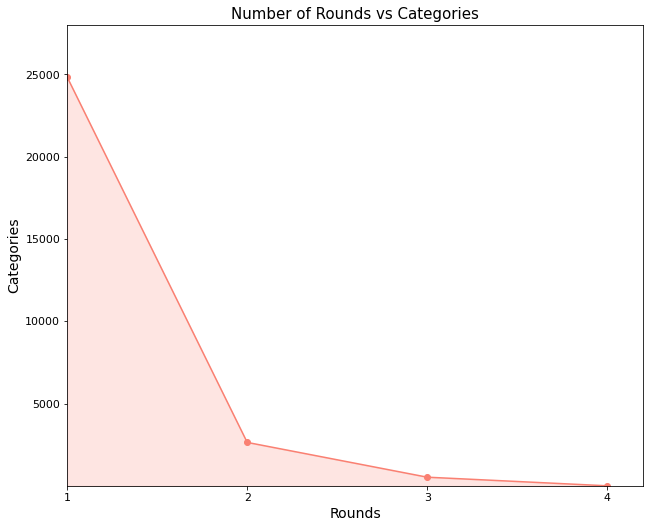

In [25]:
a= plt.figure(figsize = (10,8))
axes= a.add_axes([0.1,0.1,0.8,0.8])

x = num_categories_in_multiple_rounds['round']
y = num_categories_in_multiple_rounds['categories_count']

plt.scatter(x, y, c='salmon')
plt.plot(x, y, c='salmon')

plt.fill_between(x, y, 0,
                 facecolor="salmon", # The fill color
                 color='salmon',       # The outline color
                 alpha=0.2) 


plt.xticks(x, fontsize=11)
plt.yticks(fontsize=11)                   

axes.set_xlim([1, 4.2])
axes.set_ylim([1, 28000])

plt.xlabel('Rounds', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.title('Number of Rounds vs Categories', fontsize=15)

plt.show()

#### 3.2. Rounds and Values

3.2.1. What about values (reward) for different categories and rounds? Let's take a category, which has all 4 rounds - "LITERARY CHARACTERS" and find out. We have already seen values of the **"Jeopardy"** and **"Double Jeopardy"**, so let's inspect the other two.            

In [26]:
values_by_round = jeopardy[(jeopardy['round'] == 'Final Jeopardy!') | (jeopardy['round'] == 'Tiebreaker')]
values_by_round.head(5)

,show_number,air_date,round,category,value,question,answer
55,4680,2004-12-31,Final Jeopardy!,THE SOLAR SYSTEM,NaN,Objects that pass closer to the sun than Mercury have been named for this mythological figure,Icarus
116,5957,2010-07-06,Final Jeopardy!,HISTORIC WOMEN,NaN,"She was born in Virginia around 1596 & died in Kent, England in 1617",Pocahontas
174,3751,2000-12-18,Final Jeopardy!,SPORTS LEGENDS,NaN,"If Joe DiMaggio's hitting streak had gone one more game in 1941, this company would have given him a $10,000 contract",H.J. Heinz (Heinz 57 Varieties)
235,3673,2000-07-19,Final Jeopardy!,THE MAP OF EUROPE,NaN,"Bordering Italy, Austria, Hungary & Croatia, it's one of the world's newest independent countries",Slovenia
296,4931,2006-02-06,Final Jeopardy!,FAMOUS SHIPS,NaN,"On December 27, 1831 it departed Plymouth, England to map the coastline of South America",the HMS Beagle


Is there anything besides `NaN` there? 

In [27]:
values_by_round['value'].unique()

array([nan])

So only **"Jeopardy"** and **"Double Jeopardy"** have some reward to offer. 

3.2.2. Let's check category with many questions in it, for instance our absolute champion in this field - **"BEFORE & AFTER"**, to see how reward is distributed depending on round and number of questions per round.

In [28]:
value_by_crq = jeopardy.groupby(['category', 'round', 'value']).question.count().reset_index(name='question_count')

value_by_crq['total'] = value_by_crq.groupby('category').question_count.transform('sum')
value_by_crq = value_by_crq.sort_values(['total', 'question_count'], ascending=[False, False])

value_by_crq = value_by_crq[value_by_crq.question_count > 0 & value_by_crq['category'].isin(categories_in_multiple_rounds[categories_in_multiple_rounds['round'] > 3]['category'])]
value_by_crq[value_by_crq.category == 'BEFORE & AFTER']


,category,round,value,question_count,total
2872315,BEFORE & AFTER,Double Jeopardy!,400.0,91,547
2872323,BEFORE & AFTER,Double Jeopardy!,800.0,86,547
2872350,BEFORE & AFTER,Double Jeopardy!,2000.0,55,547
2872342,BEFORE & AFTER,Double Jeopardy!,1600.0,53,547
2872330,BEFORE & AFTER,Double Jeopardy!,1200.0,52,547
2872310,BEFORE & AFTER,Double Jeopardy!,200.0,37,547
2872318,BEFORE & AFTER,Double Jeopardy!,600.0,36,547
2872325,BEFORE & AFTER,Double Jeopardy!,1000.0,33,547
2872165,BEFORE & AFTER,Jeopardy!,200.0,21,547
2872170,BEFORE & AFTER,Jeopardy!,400.0,18,547


The main tendency is clear: 
- The **"Double Jeopardy"** in most cases has a larger reward than **"Jeopardy"**;
- The reward value is in inverse ratio to the number of questions.

But there are nuanses that worth exploring. 

3.2.3. Let's find and print 10 categories with the maximum reward value. 

In [31]:
category_by_value = jeopardy.groupby(['category', 'round', 'value']).question.count().reset_index(name='questions_count')
category_by_value['total_value'] = category_by_value.groupby('category').value.transform('sum')
category_by_value = category_by_value.sort_values(['total_value', 'value'], ascending=[False, False])
category_by_value = category_by_value[category_by_value.questions_count > 0]

category_by_value.head(10)

,category,round,value,questions_count,total_value
8007769,LANGUAGES,Double Jeopardy!,18000.0,1,2627940.0
10607328,PLUS 8,Double Jeopardy!,16400.0,1,2627940.0
8987,"""A"" IN MATH",Double Jeopardy!,14200.0,1,2627940.0
11490086,SAINTS ON THE MAP,Double Jeopardy!,14000.0,1,2627940.0
11210525,REMEMBERING TED KENNEDY,Double Jeopardy!,13800.0,1,2627940.0
9407884,NAMES FROM THE GERMAN,Double Jeopardy!,13200.0,1,2627940.0
5541603,FIRST LADIES,Double Jeopardy!,13000.0,1,2627940.0
6970723,HUMPHREY BOGART MOVIES,Double Jeopardy!,13000.0,1,2627940.0
9793583,NUMERIC PLACES,Double Jeopardy!,13000.0,1,2627940.0
4971462,ELEMENTAL CLUES,Double Jeopardy!,12400.0,1,2627940.0


Seems that our leader here is **"Languages"** category which has one mind blowing question worth 18 thousand of dollars. 

## Conclusion

We've investigated and cleaned a bit the "Jeopardy" dataset and have written some custom functions which use aggregate methods within them to find some interesting insights: that **"William the Conqueror"** is, apparently, the most popular monarch to ask questions about. 